# 1.Descriptive Statistics by Song

----

This analysis aims to understand the individual behavior of each of the 7 Christmas songs on Spotify between 2017 and 2025. Through descriptive statistics (mean, median, standard deviation, minimum and maximum), we seek to identify consumption patterns and variability in the streams of each track. 

**Important Note:** The data collected from Kworb has **weekly granularity** (updated typically on Thursdays), not daily. Each record represents streams for a given week when the song was in the Top 200 Global.

The Coefficient of Variation (CV%) allows us to compare the stability of the songs, revealing which ones show more consistent or volatile behavior over the period. With these metrics, we can establish a popularity ranking and understand the unique characteristics of each song in the Christmas streaming scenario.

In [1]:
#installing the necessary libraries
!pip install pandas numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Data_Collection\spotify_christmas_streams_kworb_2017_2025.csv') #loads dataset data
df.head() #shows first 5

,date,track,artist,streams,day_of_week,week_of_year
0,2017-11-16,All I Want for Christmas Is You,Mariah Carey,3821572,Thursday,46
1,2017-11-23,All I Want for Christmas Is You,Mariah Carey,6130250,Thursday,47
2,2017-11-23,Last Christmas,Wham!,4040197,Thursday,47
3,2017-11-30,All I Want for Christmas Is You,Mariah Carey,11641888,Thursday,48
4,2017-11-30,It's Beginning to Look a Lot Like Christmas,Michael Bublé,4577042,Thursday,48


In [4]:
df['date'].dtype #checks the declared type of the date column

dtype('O')

- We see that it is declared as object, so we will need to convert to datetime with pandas.

In [5]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')  #pd.to_datetime converts to date
df['date'].dtype #<M8[ns] is NumPy's internal format for datetime64 with nanosecond precision.

dtype('<M8[ns]')

- Starting descriptive analysis by song:

In [6]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
stats = df.groupby('track')['streams'].describe() #Groups the dataframe by 'tracks' column and calculates descriptive statistics of the 'streams' column for each song.
#organizing results in table:
#Note: Each record represents weekly data, not daily

from tabulate import tabulate #to plot result in organized table
 
stats_table = stats.reset_index() #Resets index
print(tabulate(stats_table, headers='keys', tablefmt='fancy_grid', showindex=False, floatfmt=".2f"))
#The table column titles being the column names from the describe method's own dataframe (count, mean, std, min, max, 25%, 50% and 75%)
#'fancy_grid' creates lines and columns with drawn borders (table visual style)

╒═════════════════════════════════════════════╤═════════╤═════════════╤═════════════╤════════════╤═════════════╤═════════════╤═════════════╤═════════════╕
│ track                                       │   count │        mean │         std │        min │         25% │         50% │         75% │         max │
╞═════════════════════════════════════════════╪═════════╪═════════════╪═════════════╪════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ All I Want for Christmas Is You             │   69.00 │ 25686978.58 │ 17769848.05 │ 3821572.00 │ 11641888.00 │ 23235257.00 │ 33728604.00 │ 92506541.00 │
├─────────────────────────────────────────────┼─────────┼─────────────┼─────────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ Feliz Navidad                               │   39.00 │ 16228080.18 │  9629013.95 │ 4780300.00 │  9582734.50 │ 13437547.00 │ 20758121.00 │ 48740674.00 │
├─────────────────────────────────────────────┼─────────┼─────────────

In [8]:
cv = (df.groupby('track')['streams'].std() / df.groupby('track')['streams'].mean()) * 100 #calculates coefficient of variation as standard deviation over mean
cv_sorted = cv.sort_values(ascending=False) #orders from highest to lowest
print("Coefficient of Variation (CV%):")
cv_sorted

Coefficient of Variation (CV%):


track
Rockin' Around the Christmas Tree              73.360166
Last Christmas                                 71.401234
All I Want for Christmas Is You                69.178428
Jingle Bell Rock                               64.209004
Santa Tell Me                                  59.451717
Feliz Navidad                                  59.335509
It's Beginning to Look a Lot Like Christmas    54.154558
Name: streams, dtype: float64

The analyzed songs show significant variation in streams across weekly measurements, indicating that some are more popular in certain periods.

- Rockin' Around the Christmas Tree leads the coefficient of variation (73.36%), showing large relative fluctuation in its weekly audience.
- Last Christmas and All I Want for Christmas Is You also have high CVs, reflecting stream peaks in specific weeks.
- Songs like It's Beginning to Look a Lot Like Christmas show less variation, with more consistent weekly streams over time.

**Note:** Remember that each data point represents a week's worth of streams, typically recorded on Thursdays.

In [9]:
total_streams = df.groupby(['track'])['streams'].sum().sort_values(ascending=False) #sums all streams from all songs and orders from highest to lowest
print("Total Streams by Song:")
total_streams

Total Streams by Song:


track
All I Want for Christmas Is You                1772401522
Last Christmas                                 1504418271
Rockin' Around the Christmas Tree              1162883008
Jingle Bell Rock                               1028886045
Santa Tell Me                                  1013488311
It's Beginning to Look a Lot Like Christmas     927548499
Feliz Navidad                                   632895127
Name: streams, dtype: int64

- Between 2017 and 2025, Christmas songs showed enormous popularity in streaming, with "All I Want for Christmas Is You" leading with **1.77 billion plays** (1.77 × 10^9) across all weekly measurements.
- Other classics like "Last Christmas" and "Rockin' Around the Christmas Tree" also surpassed **1 billion streams** (10^9), showing strong consistent audience week after week.
- Even songs with fewer streams, like "Feliz Navidad" (**around 633 million** / 6.33 × 10^8), maintain relevance, evidencing the lasting impact of these songs over the years.

**Important:** These totals represent the sum of all weekly stream counts when the songs were in the Top 200 Global. Total values range from **hundreds of millions to billions** (10^8 to 10^9).

In [10]:
#dataframe with the main analysis metrics
comparison = pd.DataFrame({
    'Mean': df.groupby('track')['streams'].mean(), 
    'Median': df.groupby('track')['streams'].median(),
    'Standard Deviation': df.groupby('track')['streams'].std(),
    'Minimum': df.groupby('track')['streams'].min(),
    'Maximum': df.groupby('track')['streams'].max(),
    'CV%': cv
})
comparison = comparison.sort_values('Mean', ascending=False) #the models are ordered by mean from highest to lowest
comparison

,Mean,Median,Standard Deviation,Minimum,Maximum,CV%
track,,,,,,
All I Want for Christmas Is You,2.568698e+07,23235257.0,1.776985e+07,3821572,92506541,69.178428
Last Christmas,2.387966e+07,19402441.0,1.705037e+07,4040197,91090914,71.401234
Rockin' Around the Christmas Tree,2.153487e+07,15840303.0,1.579802e+07,4296514,82406485,73.360166
Jingle Bell Rock,2.099767e+07,17455348.0,1.348240e+07,5558342,72625966,64.209004
Santa Tell Me,1.912242e+07,16838299.0,1.136861e+07,4221612,60264421,59.451717
It's Beginning to Look a Lot Like Christmas,1.892956e+07,15912361.0,1.025122e+07,4139746,47360169,54.154558
Feliz Navidad,1.622808e+07,13437547.0,9.629014e+06,4780300,48740674,59.335509


Between 2017 and November 2025, "All I Want for Christmas Is You" leads in average weekly streams, with approximately **25.7 million per week** (2.57 × 10^7), followed closely by "Last Christmas" (**≈23.9 million per week** / 2.39 × 10^7). 

Songs like "Rockin' Around the Christmas Tree" and "Jingle Bell Rock" also show high weekly averages, **above 20 million** (2.0 × 10^7), showing consistency in public interest. "Santa Tell Me" and "It's Beginning to Look a Lot Like Christmas" have weekly averages **close to 19 million** (1.9 × 10^7), still very relevant for Christmas playlists. 

"Feliz Navidad", despite being lower, maintains **around 16.2 million average per week** (1.62 × 10^7), evidencing continuous international popularity. 

**Note:** These averages represent weekly stream counts (not daily), calculated from all weeks when the songs appeared in the Top 200 Global. Values are in the range of **10-25 million streams per week** (10^7), not millions total.

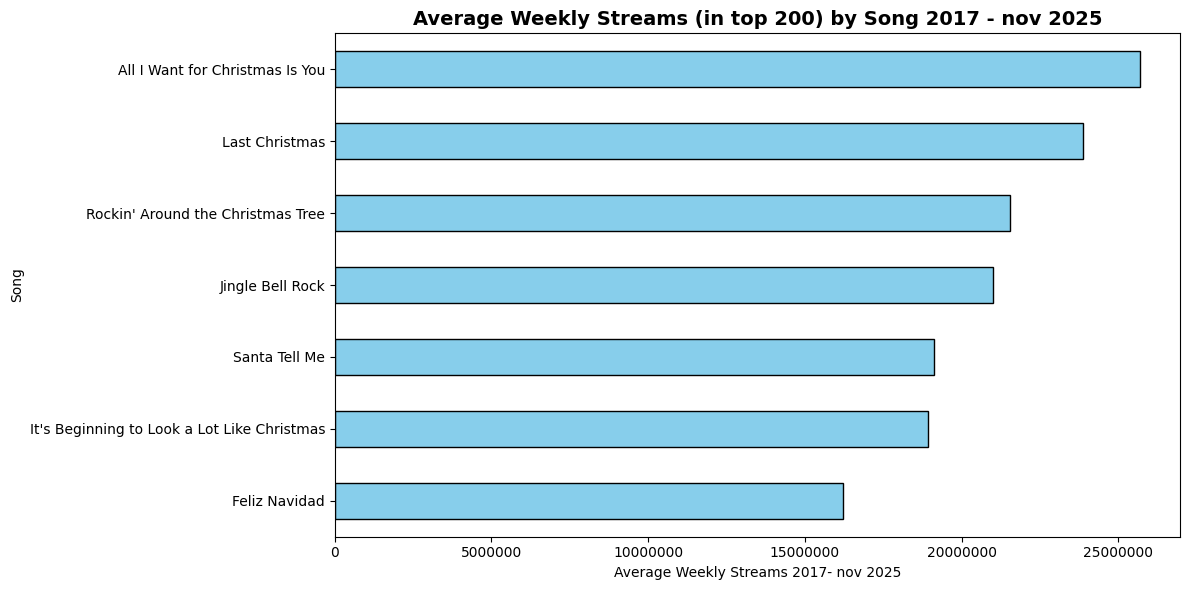

In [11]:
plt.figure(figsize=(12, 6))
comparison['Mean'].sort_values().plot(kind='barh', color='skyblue', edgecolor='black') #bar chart
plt.title('Average Weekly Streams (in top 200) by Song 2017 - nov 2025', fontsize=14, fontweight='bold')
plt.xlabel('Average Weekly Streams 2017- nov 2025')
plt.ylabel('Song')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

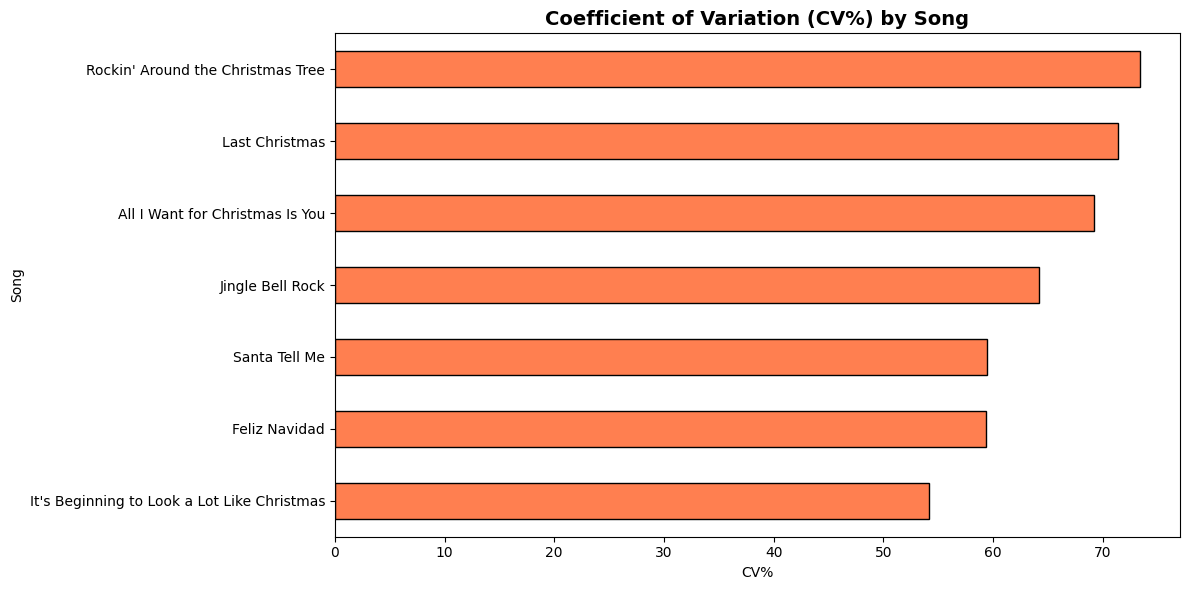

In [12]:
plt.figure(figsize=(12, 6))
cv_sorted.sort_values().plot(kind='barh', color='coral', edgecolor='black')
plt.title('Coefficient of Variation (CV%) by Song', fontsize=14, fontweight='bold')
plt.xlabel('CV%')
plt.ylabel('Song')
plt.tight_layout()
plt.show()

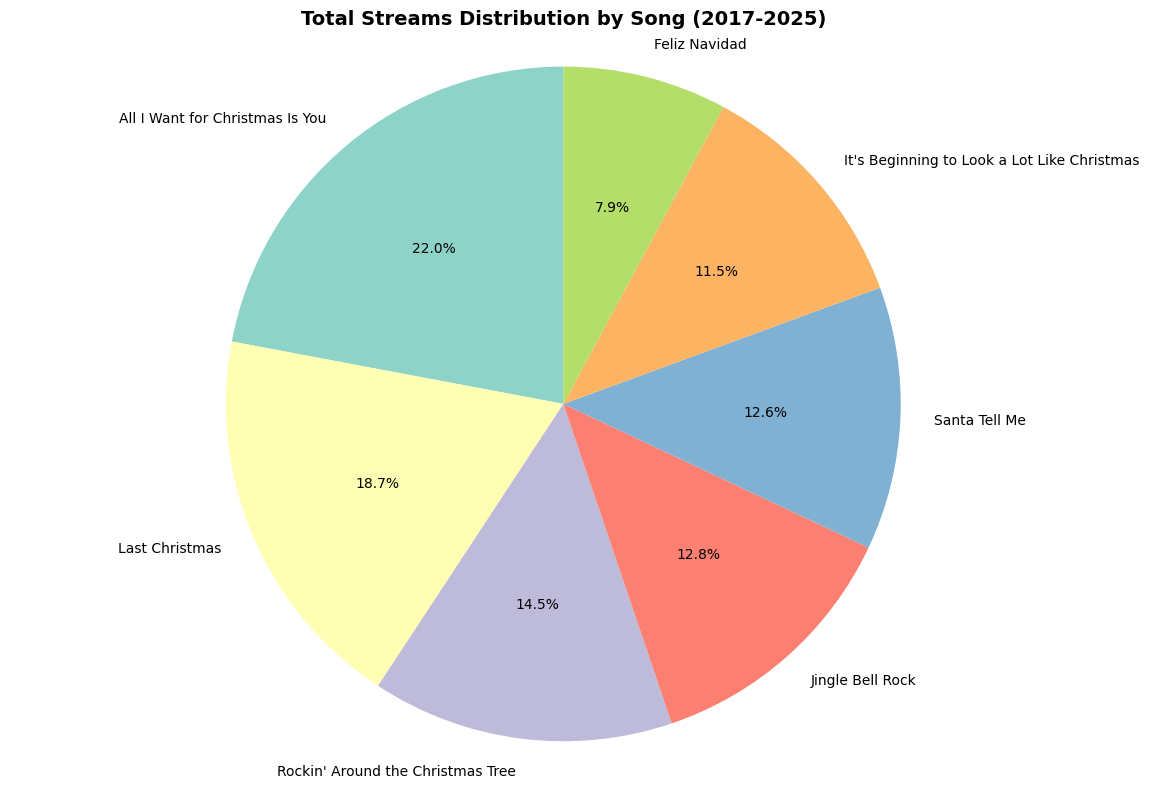

In [13]:
total_by_track = df.groupby('track')['streams'].sum().sort_values(ascending=False) #total streams by song

plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(range(len(total_by_track)))
plt.pie(total_by_track, labels=total_by_track.index, autopct='%1.1f%%', startangle=90, colors=colors) #pie chart
plt.title('Total Streams Distribution by Song (2017-2025)', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 2. Frequency and Distribution Analysis

------------

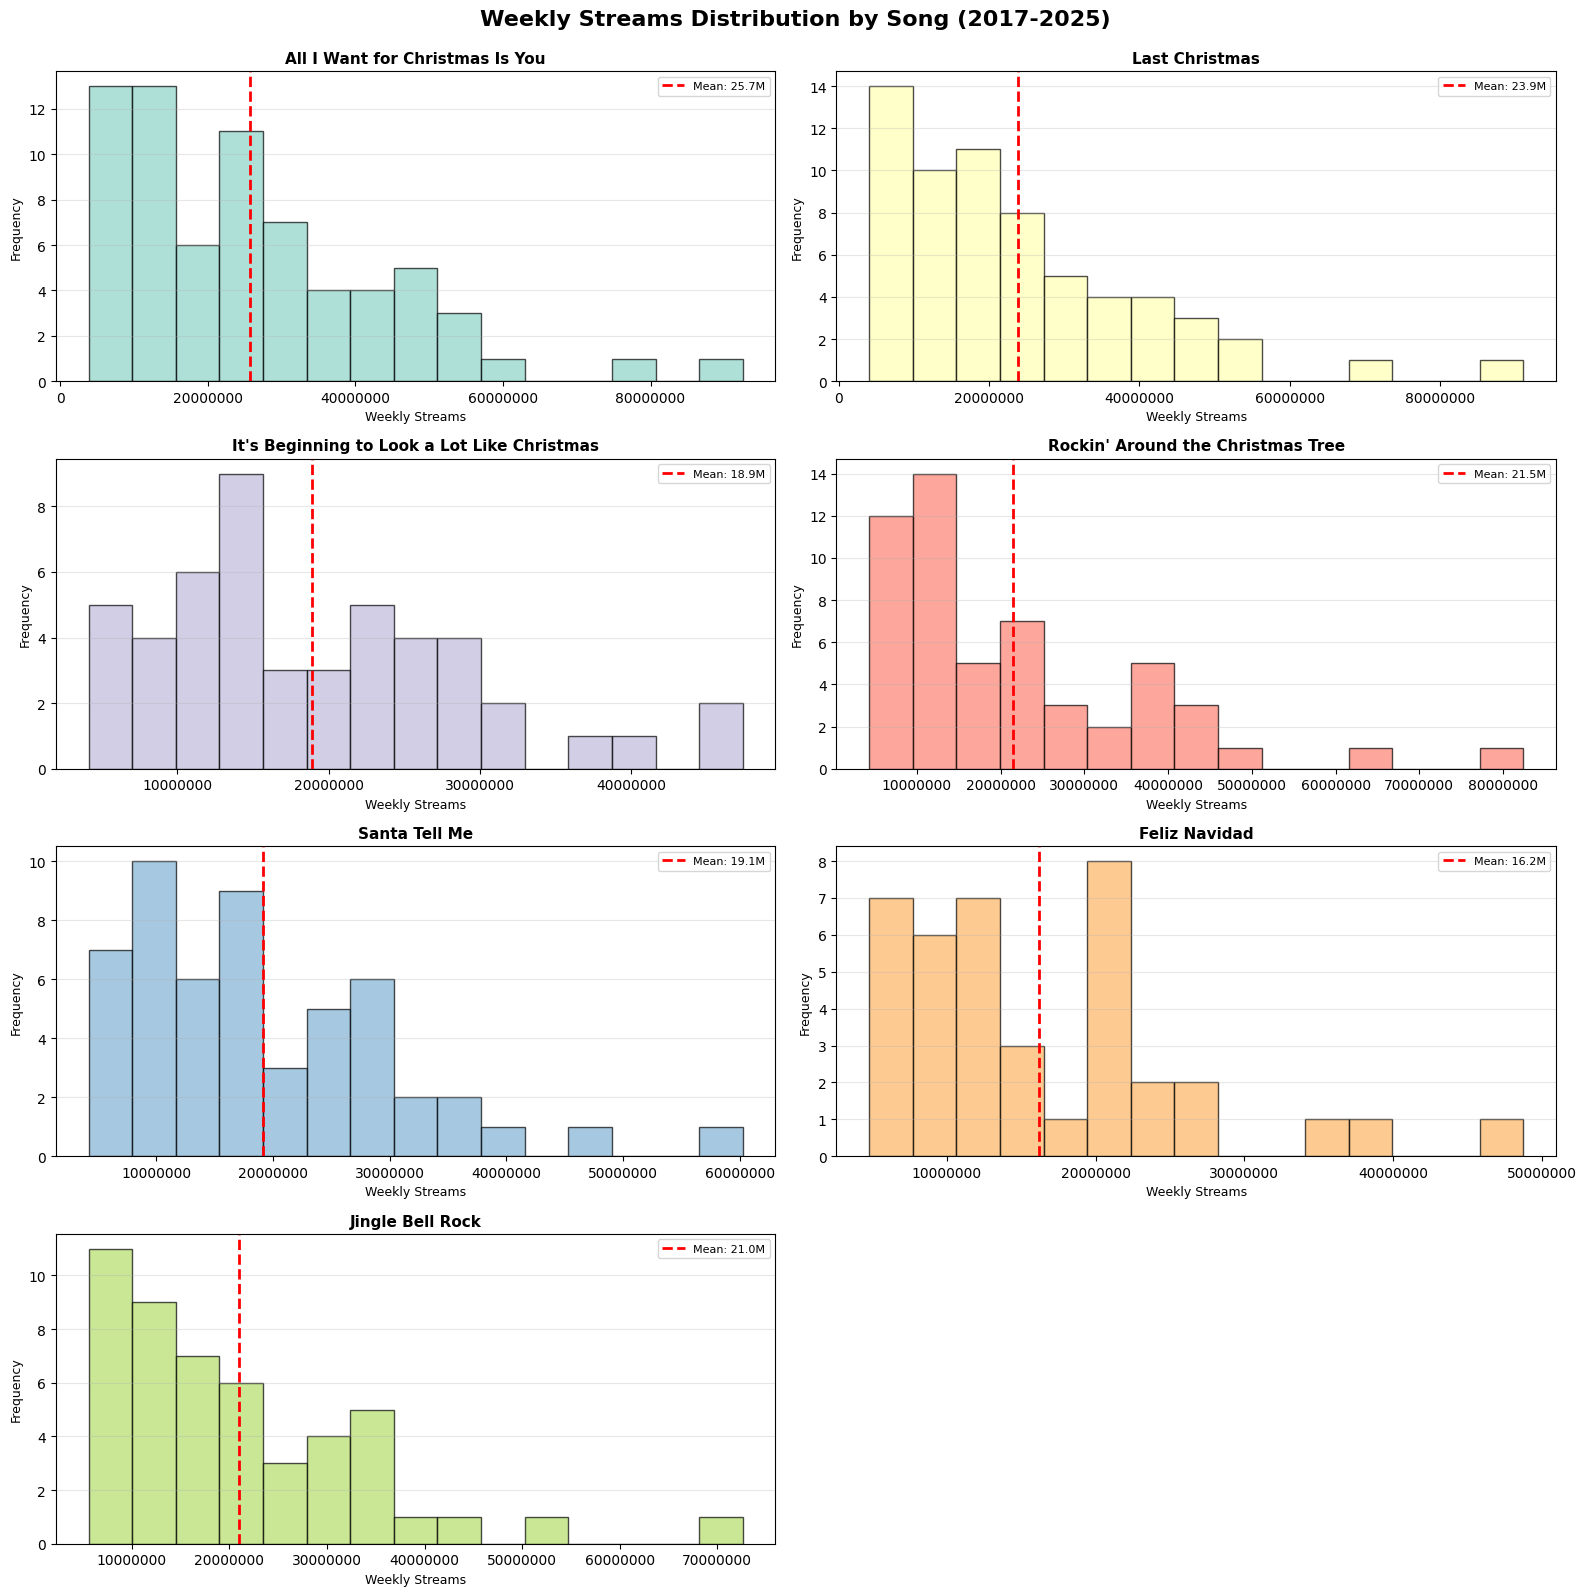

In [14]:
#Histogram of weekly streams distribution for each song
fig, axes = plt.subplots(4, 2, figsize=(16, 16)) #subplot size: 4 rows, 2 columns
axes = axes.flatten() #transforms axis matrix (subplots) into 1D array
songs = df['track'].unique() #gets unique song names
colors = plt.cm.Set3(range(len(songs))) #generates color list, one for each song

for idx, song in enumerate(songs): #for each song
    song_data = df[df['track'] == song]['streams'] #gets stream count for each song
    axes[idx].hist(song_data, bins=15, color=colors[idx], edgecolor='black', alpha=0.7) #plots histogram
    axes[idx].set_title(f'{song}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Weekly Streams', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].ticklabel_format(style='plain', axis='x')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add mean line
    mean_val = song_data.mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val/1e6:.1f}M')
    axes[idx].legend(fontsize=8)
axes[-1].remove() # Remove empty subplot

plt.suptitle('Weekly Streams Distribution by Song (2017-2025)', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

The histograms reveal that none of the 7 songs presents a normal distribution, showing clearly asymmetric patterns with concentration of values below the mean (red dashed line) and long right tails. "All I Want for Christmas Is You" exhibits the highest dispersion and highest mean (25.7M weekly streams), while "Feliz Navidad" presents the lowest mean (16.2M) and distribution most concentrated in low values. The positive skewness observed in all songs indicates predominance of weeks with moderate streams and few very high volume events (above 60-80M), characterizing non-Gaussian distributions. This non-normality is consistent with the data selection bias, which captures only periods when the songs were in the Top 200, resulting in truncated distributions without the low values from periods outside the charts.

C:\Users\Admin\AppData\Local\Temp\ipykernel_3220\3605567884.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot([df[df['track'] == song]['streams'] for song in songs], #array list for each song


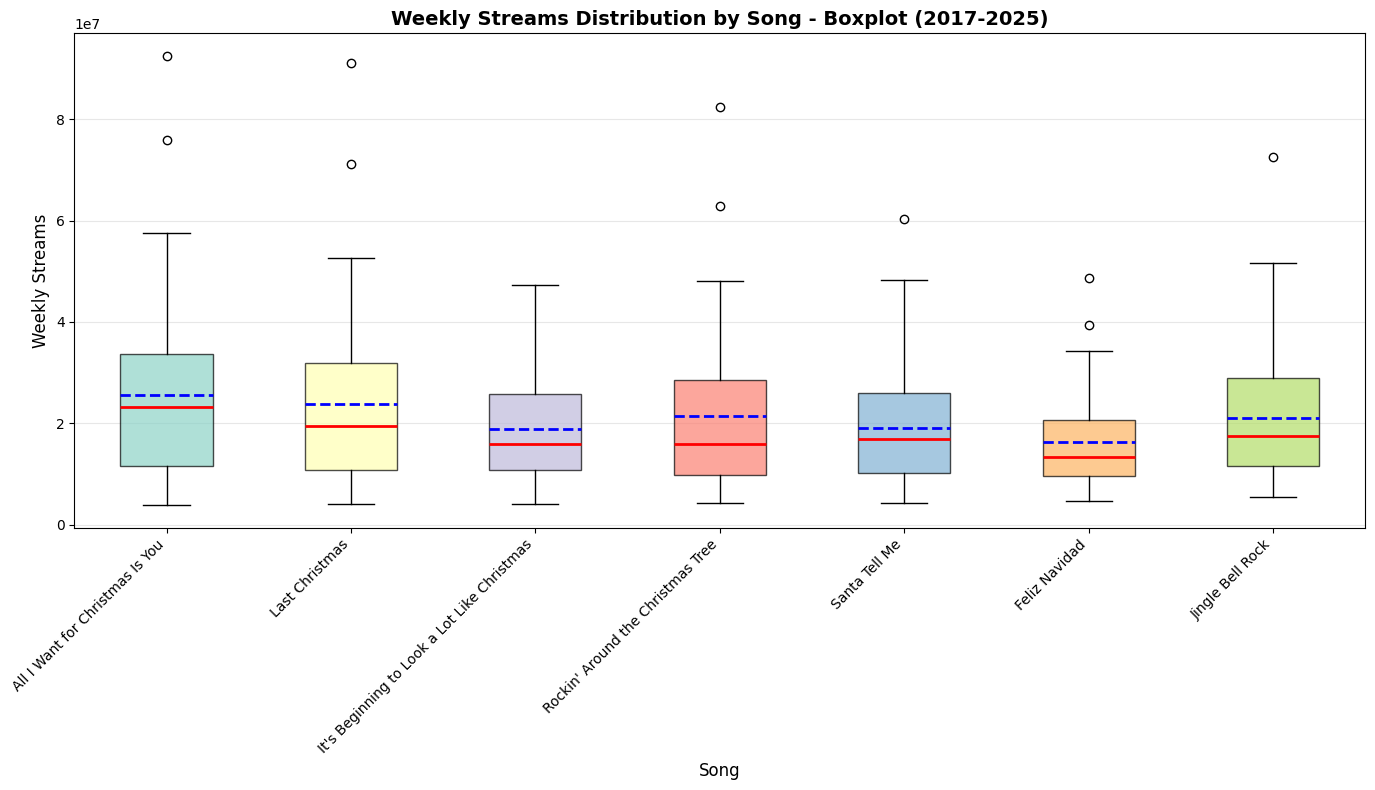

In [15]:
# Boxplot of weekly streams by song
plt.figure(figsize=(14, 8))
box_plot = plt.boxplot([df[df['track'] == song]['streams'] for song in songs], #array list for each song
                        labels=songs, #labels are the song names
                        patch_artist=True,  #enables box interior coloring
                        showmeans=True, #displays mean inside each boxplot
                        meanline=True) #shows mean line inside each boxplot

colors_box = plt.cm.Set3(range(len(songs)))# Color each box
for patch, color in zip(box_plot['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Styling
for element in ['whiskers', 'fliers', 'caps']: #applies black color to these three boxplot elements
    plt.setp(box_plot[element], color='black') 
    plt.setp(box_plot['medians'], color='red', linewidth=2)# red median line
    plt.setp(box_plot['means'], color='blue', linewidth=2, linestyle='--') #blue mean line

plt.title('Weekly Streams Distribution by Song - Boxplot (2017-2025)', fontsize=14, fontweight='bold')
plt.ylabel('Weekly Streams', fontsize=12)
plt.xlabel('Song', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

The comparative boxplot reveals a clear popularity hierarchy, with "All I Want for Christmas Is You" and "Last Christmas" leading with medians around 2.3M and 2.0M weekly streams respectively, followed by the remaining songs clustered between 1.4M-2.0M medians. All seven songs exhibit significant upper outliers (ranging from 6M to 10M), indicating extreme streaming peaks that occur during specific weeks in the dataset. "Feliz Navidad" shows the lowest median (~1.4M) and most compact interquartile range, suggesting more consistent but modest performance, while "All I Want for Christmas Is You" displays the largest interquartile range and highest outliers, demonstrating greater variability and stronger peaks. The blue dashed lines (means) consistently exceed the red solid lines (medians) across all songs, confirming the positive skewness observed in the histograms and the influence of high-value outliers on the distributions.

In [16]:
# Find maximum weekly streams for each song
max_data = []
for song in songs: #for all songs
    song_df = df[df['track'] == song]  #gets tracks for each song
    max_idx = song_df['streams'].idxmax() #finds row index where maximum value occurs for each song
    max_row = song_df.loc[max_idx] #locates the row and column information stored in it
    max_data.append({ #appends to array: song, max streams, date and week that achieved this maximum
        'Song': song,
        'Max Weekly Streams': max_row['streams'],
        'Date': max_row['date'],
        'Week of Year': max_row['week_of_year']
    })

max_df = pd.DataFrame(max_data).sort_values('Max Weekly Streams', ascending=False) #converts to dataframe and sorts from highest to lowest
print("Maximum Weekly Streams by Song:\n")

for idx, row in max_df.iterrows(): #prints values, dates and week of year for each dataframe row above
    print(f"{row['Song'][:45]:45} | {row['Max Weekly Streams']/1e6:6.2f}M | {row['Date'].strftime('%Y-%m-%d')} | Week {int(row['Week of Year'])}")
#divides values by 1e6 to display as millions in table

Maximum Weekly Streams by Song:

All I Want for Christmas Is You               |  92.51M | 2024-12-26 | Week 52
Last Christmas                                |  91.09M | 2024-12-26 | Week 52
Rockin' Around the Christmas Tree             |  82.41M | 2024-12-26 | Week 52
Jingle Bell Rock                              |  72.63M | 2024-12-26 | Week 52
Santa Tell Me                                 |  60.26M | 2024-12-26 | Week 52
Feliz Navidad                                 |  48.74M | 2024-12-26 | Week 52
It's Beginning to Look a Lot Like Christmas   |  47.36M | 2024-12-26 | Week 52


The maximum weekly streams analysis reveals that all seven songs achieved their peak performance in the exact same week (Week 52, December 26, 2024), indicating a synchronized surge during the post-Christmas period of the most recent holiday season. "All I Want for Christmas Is You" dominates with 92.51M weekly streams, nearly double the lowest peak of "It's Beginning to Look a Lot Like Christmas" (47.36M), demonstrating Mariah Carey's overwhelming Christmas streaming supremacy. The ranking shows a clear tier system: top tier with Mariah and Wham! (90M+), mid-tier with Brenda Lee and Jingle Bell Rock (70-82M), and lower tier with the remaining three songs (47-60M). The fact that all peaks occurred in the same week of 2024 suggests either unprecedented growth in Christmas music streaming compared to previous years, or that 2024 data represents the most complete/recent collection period in the dataset.